## Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): 
### CRIM: per capita crime rate by town
### ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
### INDUS: proportion of non-retail business acres per town
### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
### NOX: nitric oxides concentration (parts per 10 million)
### RM: average number of rooms per dwelling
### AGE: proportion of owner-occupied units built prior to 1940
### DIS: weighted distances to ﬁve Boston employment centers
### RAD: index of accessibility to radial highways
### TAX: full-value property-tax rate per `$10,000`
### PTRATIO: pupil-teacher ratio by town 12. 
### B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
### LSTAT: % lower status of the population
### MEDV: Median value of owner-occupied homes in `$1000s`
We can see that the input attributes have a mixture of units.

# Fetch Data

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None)


In [2]:
train = pd.read_csv('HousingData.csv')
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
train.shape

(506, 14)

# Drop Unnecessary
**First We Will Drop Unique Columns**

In [4]:

for i in train.columns: # loop --
    print(i, len(train[i].unique()))        

CRIM 485
ZN 27
INDUS 77
CHAS 3
NOX 81
RM 446
AGE 349
DIS 412
RAD 9
TAX 66
PTRATIO 46
B 357
LSTAT 439
MEDV 229


# Find and replace Missing Data

In [5]:
train[['AGE']].value_counts().max()

42

In [6]:
def replacemissing(df):
    Q = pd.DataFrame(df.isna().sum(),columns=['count_mv'])
    R = Q[Q.count_mv > 0]
    cat = []
    con = []
    for i in R.index:
        if(df[i].dtypes == 'object'):
            replacer = df[i].mode()[0]
            df[i] = df[i].fillna(replacer)
        else:
            replacer = round(df[i].mean(),2)
            df[i] = df[i].fillna(replacer)

In [7]:
replacemissing(train)

In [8]:
train.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
train.isna().sum().index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Define X and Y

In [10]:
train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
Y = train[['MEDV']]
X = train.drop('MEDV',axis=1)

In [12]:

y = np.round(train["MEDV"])

# Separate cat and con

In [13]:
cat = []
con = []
for i in X.columns:
    if (X[i].dtypes=='object'):
        cat.append(i)
    else:
        con.append(i)

# Univariate

In [14]:
X.skew().sort_values().index

Index(['B', 'PTRATIO', 'AGE', 'INDUS', 'RM', 'TAX', 'NOX', 'LSTAT', 'RAD',
       'DIS', 'ZN', 'CHAS', 'CRIM'],
      dtype='object')

In [15]:
X.skew().sort_values() > 0.7

B          False
PTRATIO    False
AGE        False
INDUS      False
RM         False
TAX        False
NOX         True
LSTAT       True
RAD         True
DIS         True
ZN          True
CHAS        True
CRIM        True
dtype: bool

In [16]:
cols_with_skew = ["NOX", "LSTAT", "RAD", "DIS", "ZN", "CHAS", "CRIM"]

In [17]:
cols_with_skew

['NOX', 'LSTAT', 'RAD', 'DIS', 'ZN', 'CHAS', 'CRIM']

In [18]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.20,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.90,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.10,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.80,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.20,6.0622,3,222,18.7,396.90,12.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.10,2.4786,1,273,21.0,391.99,12.72
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.70,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.00,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.30,2.3889,1,273,21.0,393.45,6.48


In [19]:
X.skew().sort_values()

B         -2.890374
PTRATIO   -0.802325
AGE       -0.594268
INDUS      0.309942
RM         0.403612
TAX        0.669956
NOX        0.729308
LSTAT      0.927214
RAD        1.004815
DIS        1.011781
ZN         2.302305
CHAS       3.450743
CRIM       5.318396
dtype: float64

In [31]:
X.CHAS

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64

In [38]:
dct = {}
zn = []
chas = []
for i in X.ZN:
    if i == 0 or i == 0.0:
        zn.append(0.001)
    else:
        zn.append(i)
        
        
for i in X.CHAS:
    if i == 0 or i == 0.0:
        chas.append(0.001)
    else:
        chas.append(i)
X["CHAS"] = chas
X["ZN"] = zn
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.000,2.31,0.001,0.538,6.575,65.20,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.001,7.07,0.001,0.469,6.421,78.90,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.001,7.07,0.001,0.469,7.185,61.10,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.001,2.18,0.001,0.458,6.998,45.80,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.001,2.18,0.001,0.458,7.147,54.20,6.0622,3,222,18.7,396.90,12.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.001,11.93,0.001,0.573,6.593,69.10,2.4786,1,273,21.0,391.99,12.72
502,0.04527,0.001,11.93,0.001,0.573,6.120,76.70,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.001,11.93,0.001,0.573,6.976,91.00,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.001,11.93,0.001,0.573,6.794,89.30,2.3889,1,273,21.0,393.45,6.48


In [40]:
X = np.log(X[cols_with_skew])
X

,NOX,LSTAT,RAD,DIS,ZN,CHAS,CRIM
0,-0.619897,1.605430,0.000000,1.408545,2.890372,-6.907755,-5.064036
1,-0.757153,2.212660,0.693147,1.602836,-6.907755,-6.907755,-3.600502
2,-0.757153,1.393766,0.693147,1.602836,-6.907755,-6.907755,-3.601235
3,-0.780886,1.078410,1.098612,1.802073,-6.907755,-6.907755,-3.430523
4,-0.780886,2.543176,1.098612,1.802073,-6.907755,-6.907755,-2.672924
...,...,...,...,...,...,...,...
501,-0.556870,2.543176,0.000000,0.907694,-6.907755,-6.907755,-2.770511
502,-0.556870,2.206074,0.000000,0.827460,-6.907755,-6.907755,-3.095111
503,-0.556870,1.729884,0.000000,0.773574,-6.907755,-6.907755,-2.800824
504,-0.556870,1.868721,0.000000,0.870833,-6.907755,-6.907755,-2.211009


In [41]:
X.skew()

NOX      0.357780
LSTAT   -0.373088
RAD      0.286617
DIS      0.152730
ZN       0.958182
CHAS     2.771673
CRIM     0.321717
dtype: float64

CRIM    0.321717
dtype: float64

<AxesSubplot:xlabel='RAD', ylabel='count'>

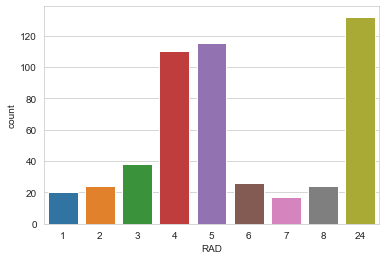

In [21]:
sn.set_style('whitegrid')
sn.countplot(x='RAD',data=train)

# Bivariate

<AxesSubplot:>

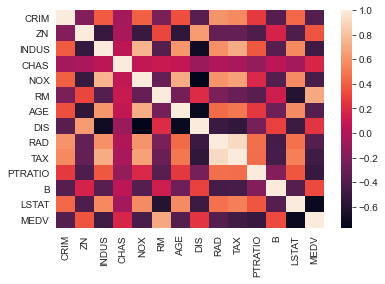

In [22]:
sn.heatmap(train.corr())

In [23]:
abs(train.corr()['MEDV'].sort_values() ) > 0.45

LSTAT       True
PTRATIO     True
INDUS       True
TAX         True
NOX        False
RAD        False
AGE        False
CRIM       False
CHAS       False
DIS        False
B          False
ZN         False
RM          True
MEDV        True
Name: MEDV, dtype: bool

In [24]:
imp = train.corr()['MEDV'].sort_values().index


In [25]:
imp_cols = ['LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'RM']

In [26]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.20,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.90,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.10,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.80,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.20,6.0622,3,222,18.7,396.90,12.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.10,2.4786,1,273,21.0,391.99,12.72
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.70,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.00,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.30,2.3889,1,273,21.0,393.45,6.48


<AxesSubplot:>

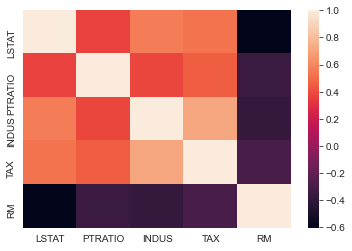

In [27]:
sn.heatmap(X[imp_cols].corr())

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

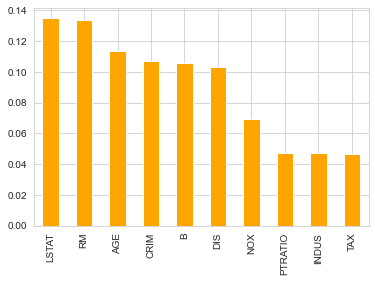

In [29]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', color = "orange")
plt.show()

In [30]:
imp_feat = list(feat_importances.nlargest(6).index)

# Data Preprocession

In [31]:
# X1 = pd.get_dummies(X[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(X[imp_feat]),columns=imp_feat)
# X = X2.join(X1)

In [32]:
X =  X2

In [33]:
X

,LSTAT,RM,AGE,CRIM,B,DIS
0,-1.104172,0.413672,-0.121061,-0.422320,0.441052,0.140214
1,-0.510378,0.194274,0.378714,-0.419861,0.441052,0.557160
2,-1.239774,1.282714,-0.270629,-0.419864,0.396427,0.557160
3,-1.395359,1.016303,-0.828772,-0.419268,0.416163,1.077737
4,0.000626,1.228577,-0.522341,-0.414972,0.441052,1.077737
...,...,...,...,...,...,...
501,0.000626,0.439316,0.021210,-0.415724,0.387217,-0.625796
502,-0.518943,-0.234548,0.298458,-0.417757,0.441052,-0.716639
503,-1.009964,0.984960,0.820121,-0.415943,0.441052,-0.773684
504,-0.890064,0.725672,0.758105,-0.410223,0.403225,-0.668437


# Divide the data in training and testing set

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 31)

# Ridge Regularization 

In [35]:
x = 0
for i in range(0,30):
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.00005

=============== 0 =============
Training Error:  3.87
Testing Error:  3.51
=============== 5e-05 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.0001 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.00015000000000000001 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.0002 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.00025 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.00030000000000000003 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.00035000000000000005 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.0004000000000000001 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.0004500000000000001 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.0005000000000000001 =============
Training Error:  3.87
Testing Error:  3.51
=============== 0.00055000000000

In [36]:
from sklearn.linear_model import Ridge, RidgeCV


In [37]:
re = RidgeCV()
bestalpha = re.fit(xtrain, ytrain)
rr = Ridge(alpha=bestalpha.alpha_)

model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
ts_err = round(mean_absolute_error(ytest,ts_pred),2)
print("===============",bestalpha.alpha_,"=============")
print("Training Error: ",tr_err)
print("Testing Error: ",ts_err)
if(tr_err < ts_err):
    print("Overfitting")

=============== 10.0 =============
Training Error:  3.87
Testing Error:  3.51


# Lasso Regularization

In [38]:
x = 1
for i in range(0,30):
    from sklearn.linear_model import Lasso
    rr = Lasso(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.05

=============== 1 =============
Training Error:  4.16
Testing Error:  3.75
=============== 1.05 =============
Training Error:  4.17
Testing Error:  3.78
=============== 1.1 =============
Training Error:  4.18
Testing Error:  3.8
=============== 1.1500000000000001 =============
Training Error:  4.2
Testing Error:  3.82
=============== 1.2000000000000002 =============
Training Error:  4.21
Testing Error:  3.84
=============== 1.2500000000000002 =============
Training Error:  4.22
Testing Error:  3.86
=============== 1.3000000000000003 =============
Training Error:  4.23
Testing Error:  3.88
=============== 1.3500000000000003 =============
Training Error:  4.25
Testing Error:  3.91
=============== 1.4000000000000004 =============
Training Error:  4.26
Testing Error:  3.93
=============== 1.4500000000000004 =============
Training Error:  4.27
Testing Error:  3.94
=============== 1.5000000000000004 =============
Training Error:  4.27
Testing Error:  3.96
=============== 1.5500000000000005 =

In [39]:
from sklearn.linear_model import Lasso, LassoCV
ls = LassoCV(alphas=None, max_iter = 200000, normalize = True)
ls = ls.fit(xtrain, ytrain)

rr = Lasso(alpha=ls.alpha_)
model = rr.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import mean_absolute_error
tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
ts_err = round(mean_absolute_error(ytest,ts_pred),2)
print("===============",ls.alpha_,"=============")
print("Training Error: ",tr_err)
print("Testing Error: ",ts_err)
if(tr_err < ts_err):
    print("Overfitting")
    

=============== 0.0012203354032771134 =============
Training Error:  3.87
Testing Error:  3.51


In [40]:
from pickle import dump

In [41]:
dump(model, open("bostMdl.pkl", "wb"))

In [43]:
xtrain.columns

Index(['LSTAT', 'RM', 'AGE', 'CRIM', 'B', 'DIS'], dtype='object')